In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from proj_helper import Helper, TimeHelper
import joblib

1 - General Greeting	Used Hi for all injection words (Hey, Hi,..) <br>
2 - Greeting + Checkback	Replaced usergreetings -> Good Morning <br>
3 - Ask Available Services	Eg:- All available services <br>
4 - Ask General Services	Eg :- Hair cut, Colouring … <br> 
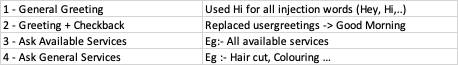

In [2]:
chat_data = pd.read_excel('UserChatData.xlsx', header=0) 

In [3]:
chat_data.head()

,Chat,Group
0,interjection,1
1,interjection I am username,1
2,interjection I'm username,1
3,interjection Glad to meet you!,1
4,interjection Nice to meet you!,1


In [4]:
chat_data['Group'].value_counts()

3    64
4    60
2    60
1    60
5    59
Name: Group, dtype: int64

In [5]:
item = Helper()
# item.preprocess("Heyy I'm Mudith")

for row in range(len(chat_data['Chat'])):
    chat_data['Chat'][row] = item.preprocess_givendata(chat_data['Chat'][row])

chat_data['Chat']

Time  13


<ipython-input-5-659158dd99a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chat_data['Chat'][row] = item.preprocess_givendata(chat_data['Chat'][row])


0                                           interjection
1                             interjection I am username
2                             interjection I 'm username
3                          interjection Glad to meet you
4                          interjection Nice to meet you
                             ...                        
298                        My wife need to have gservice
299    My husband would like to get gservice from you...
300                       She would like to get gservice
301                                      He need to have
302        could you interjection add appointment for me
Name: Chat, Length: 303, dtype: object

In [6]:
shuffle_df = chat_data.sample(n=len(chat_data), random_state=12)
x_train,x_test,y_train,y_test=train_test_split(shuffle_df['Chat'],shuffle_df['Group'],test_size=0.3,random_state = 12)

In [7]:
# pipe = Pipeline([('Count_Vect',CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('MNB', MultinomialNB(alpha=0.1))])

# pipe = Pipeline([('Count_Vect',CountVectorizer()),
#                  ('tfidf', TfidfTransformer()),
#                  ('SGD', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=12, max_iter=5, tol=None))])

pipe = Pipeline([('Count_Vect',CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('LR', LogisticRegression(n_jobs=1, C=1e5, solver='lbfgs',max_iter=250))])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
y_true = y_test

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.90      0.92        20
           2       0.89      1.00      0.94        16
           3       1.00      0.89      0.94        18
           4       0.89      0.89      0.89        18
           5       0.95      1.00      0.97        19

    accuracy                           0.93        91
   macro avg       0.94      0.94      0.93        91
weighted avg       0.94      0.93      0.93        91



In [8]:
confusion_matrix(y_true, y_pred,labels=[1, 2, 3, 4, 5])

array([[18,  2,  0,  0,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0, 16,  2,  0],
       [ 1,  0,  0, 16,  1],
       [ 0,  0,  0,  0, 19]])

In [9]:
# save the model to disk
filename = 'Group_model.sav'
joblib.dump(pipe, filename)

['Group_model.sav']

In [10]:
# load the model from disk
# loaded_model = joblib.load("Group_model.sav")

In [11]:
item.preprocess("Hi There")

'Hi There'

In [12]:
# loaded_model.predict([item.preprocess("Hi There")])
# print(x_test)

In [13]:
item.preprocess_givendata("Hi I'm Mudith. Good Morning. I need to know about hair cut and coloring. Reservation for Lalith")

"interjection i 'm username usergreet i need to know about gservice and gservice reservation for lalith"

In [14]:
item.check_client_name("Yes it's for Lalith")

Name detected:-  Lalith


In [15]:
d = {'chat': x_test, 'actual': y_test, 'pred': y_pred}
len(y_train)
df = pd.DataFrame(data=d)
df[80:90]

,chat,actual,pred
183,usergreet My name is username I would like t...,3,3
289,interjection How could I make an appointment f...,5,5
241,Is gservice available,4,4
45,interjection Good day to you,1,2
190,I would like to know about gservice prices,4,4
152,Any available services,3,3
208,could you interjection provide gservice prices,4,4
153,interjection what services are available,3,3
50,interjection usergreet I 'm username,1,1
211,Do your saloon has,4,4
